Problem: Atmospheric Dispersion

Assume $$ n =1+[7.76 \times 10^{-5} (1 + 7.52 \times 10 ^{-3} \lambda ^{-2}) \frac{P}{T}]$$

Using that the difference in pathlength 
$$ \Delta l(\lambda) = (n(\lambda)-1) dh $$

The airmass is given by 
$${\displaystyle X=\sec \,z\,-\,0.0018167\,(\sec \,z\,-\,1)\,-\,0.002875\,(\sec \,z\,-\,1)^{2}\,-\,0.0008083\,(\sec \,z\,-\,1)^{3}\,}$$ and the height above the atmosphere is 
$${\frac  {R_{{\mathrm  {E}}}}{dh_{{\mathrm  {atm}}}}}={\frac  {X^{2}-1}{2\left(1-X\cos z\right)}}$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import astropy.units as u

In [4]:
#constants
P0=650 #in millibar
T0=273 #in Kelvin
RE=6371 #in km

@numba.vectorize("float64(float64)")
def index_of_refraction(wave):
    return 1+(7.76*10**-5*(1+7.52*10**-3*(wave**-2)*P0/T0))

secant= lambda x: 1/np.cos(x)

@numba.vectorize("float64(float64)")
def airmass(z):
    return secant(z)-0.0018167*(secant(z)-1)-0.002875*((secant(z)-1)**2)-0.0008083*((secant(z)-1)**3)

@numba.vectorize("float64(float64)")
def height_above_atmosphere(z):
    x=airmass(z)
    return RE*2*(1-x*np.cos(z))/(x**2-1)

def path_length(n, dh):
    return (n-1)*dh


In [5]:
wavelength=np.linspace(0.3, 10, 1000)
zs=(np.array([20, 40, 70])*u.degree).to(u.radian).value

In [6]:
airmass(zs)

array([1.06404913, 1.30456127, 2.90391385])

In [7]:
dhs=height_above_atmosphere(zs)*u.km.to(u.m)
dhs

array([11651.70864536, 11765.47860706, 11662.41684545])

In [8]:
ns=index_of_refraction(wavelength)

In [9]:
pathlengths=np.array([path_length(ns, dh) for dh in dhs])

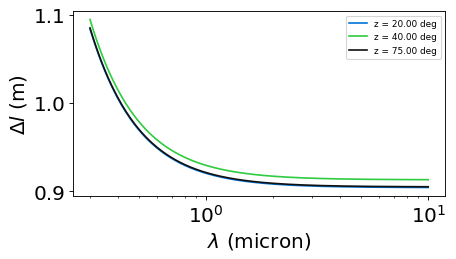

In [10]:
plt.plot(wavelength, pathlengths[0], c='#0074D9', label='z = {0:.{1}f} deg'.format(20.0, 2))
plt.plot(wavelength, pathlengths[1], c='#2ECC40', label='z = {0:.{1}f} deg'.format(40.0, 2))
plt.plot(wavelength, pathlengths[2], c='#111111', label='z = {0:.{1}f} deg'.format(75.0, 2))
plt.xscale('log')
plt.ylabel(r'$\Delta l$ (m)')
plt.xlabel(r'$\lambda$ (micron)')
plt.legend(prop={'size': 8})

An image will be elongated by factor of 0.9/10 on the red side and 1.1/10 on the blue side 

There's an overal change of 1.1-0.9=0.1/10 $\approx$0.02

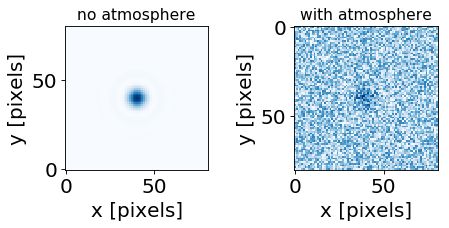

In [11]:
#generate airy disk then add an average 
from astropy.convolution import AiryDisk2DKernel
airydisk_2D_kernel = AiryDisk2DKernel(10)
img_data=airydisk_2D_kernel.array

#add a factor of 0.02 gaussian noise?
ps=0.02*np.random.random(size=img_data.shape)
fig, ax=plt.subplots(ncols=2)
ax[0].imshow(img_data, interpolation='none', origin='lower', cmap='Blues')
ax[1].imshow(img_data+ps, cmap='Blues')

for a in ax:
    a.set_xlabel('x [pixels]')
    a.set_ylabel('y [pixels]')
ax[0].set_title('no atmosphere', fontsize=14)
ax[1].set_title('with atmosphere', fontsize=14)
plt.tight_layout()

(b) The pathlength difference between 700 nm and 2.2 micron is $\approx$ 0.1 m according to the first figure, the relative motion

(c) An Atmospheric Dispersion Corrector (ADC) works to remove the effects of the atmospheric dispersion by applying the opposite effect of the atmsophere on the image on bluer $\lambda$s